## Program 1:
#### Write a python program to find the best fit straight line of the form y = a+bx and draw the scatter plot.

Enter x values: 0 1 3 6 8
Enter y values: 1 3 2 5 4
Y Calculated values:  [1.6460177  2.02212389 2.77433628 3.90265487 4.65486726]
The Linear Regression Line for the given data:
Y = (1.6460) + (0.3761)X
Sum of Squares due to Total (SST): 10.0000
Sum of Squares due to Regression (SSR): 6.3938
Sum of Squares due to Error (SSE): 3.6062
R Square value: 0.6394


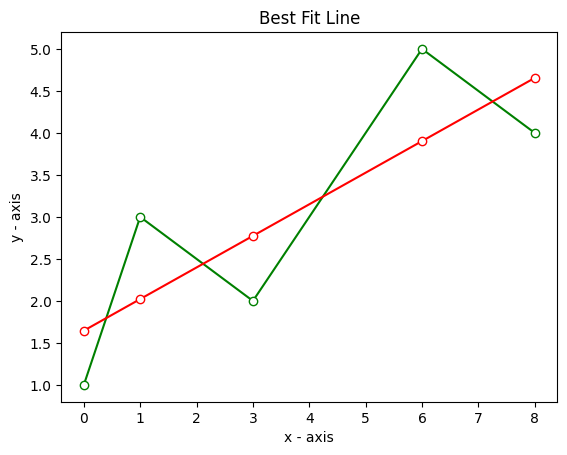

X-Y Graph: Green
X-Ycal Graph: Red
The Regression Line Y = (1.6460) + (0.3761)X is not the best fit for given data


In [17]:
# Linear Regression:

import matplotlib.pyplot as plt
import numpy as np

def mymean(data):
    Sum = 0
    n = len(data)
    for i in data:
        Sum += i
    return Sum/n

def drawPlotLine(x,y,Y_cal):
    Y_color = 'green'
    Y_cal_color = 'red'
    plt.plot(x,y,color=Y_color,marker='o',markerfacecolor='w')
    plt.plot(x,Y_cal,color=Y_cal_color,marker='o',markerfacecolor='w')
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title("Best Fit Line")
    plt.show()
    print("X-Y Graph: Green")
    print("X-Ycal Graph: Red")

def LinearRegression(x,y):
    n = len(x)
    m = len(y)

    if n != m:
        print("Invalid Data!")
        return

    SumX = sum(x)
    SumY = sum(y)

    slope = (n*sum(x*y) - SumX*SumY) / (n*sum(x**2) - SumX**2)
    constant = (SumY - slope*SumX) / n

    Y_cal = slope*x + constant

    meanY = mymean(y)

    SST = sum((y-meanY)**2)
    SSE = sum((y-Y_cal)**2)
    SSR = sum((Y_cal-meanY)**2)

    Rsq = SSR/SST
    # Rsq = 1 - SSE/SST

    print("Y Calculated values: ",Y_cal)
    print("The Linear Regression Line for the given data:")
    print("Y = ({:.4f}) + ({:.4f})X".format(constant,slope))
    print("Sum of Squares due to Total (SST): {:.4f}".format(SST))
    print("Sum of Squares due to Regression (SSR): {:.4f}".format(SSR))
    print("Sum of Squares due to Error (SSE): {:.4f}".format(SSE))
    print("R Square value: {:.4f}".format(Rsq))

    drawPlotLine(x,y,Y_cal)

    if Rsq > 0.9:
        print("The Regression Line Y = ({:.4f}) + ({:.4f})X is the best fit for given data".format(constant,slope))
    else:
        print("The Regression Line Y = ({:.4f}) + ({:.4f})X is not the best fit for given data".format(constant,slope))

x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

LinearRegression(x,y)

## Program 2:
#### Write a python program to fit a second degree parabola of the form y = a+bx+cx2 and draw the scatter plot.

Enter x values: 0 1 2 3 4
Enter y values: 1 1.8 1.3 2.5 6.3
Y Calculated values:  [1.42 0.9  1.48 3.16 5.94]
The Parabola Regression Curve for the given data: 
Y = (1.4200) + (-1.0700)X + (0.5500)X2
Sum of Squares due to Total (SST): 18.5880
Sum of Squares due to Regression (SSR): 17.0040
Sum of Squares due to Error (SSE): 1.5840
R Square value: 0.9148


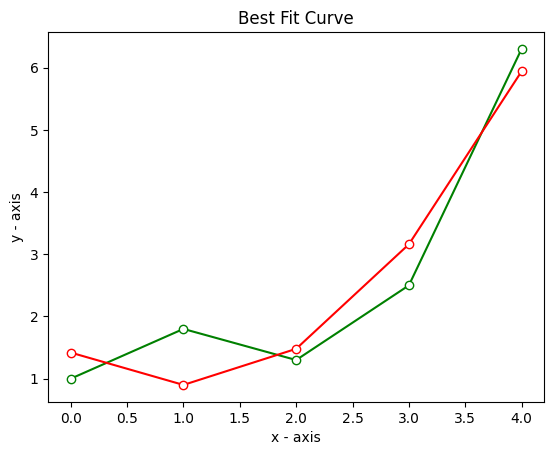

X-Y Graph: Green
X-Ycal Graph: Red
The Regression Curve Y = (1.4200) + (-1.0700)X + (0.5500)X2 is the best fit for given data.


In [18]:
# Parabola Regression:

import matplotlib.pyplot as plt
import numpy as np

def mymean(data):
    Sum = 0
    n = len(data)
    for i in data:
        Sum += i
    return Sum/n

def drawPlotParabola(x,y,Y_cal):
    Y_color = 'green'
    Y_cal_color = 'red'
    plt.plot(x,y,color=Y_color,marker='o',markerfacecolor='w')
    plt.plot(x,Y_cal,color=Y_cal_color,marker='o',markerfacecolor='w')
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title("Best Fit Curve")
    plt.show()
    print("X-Y Graph: Green")
    print("X-Ycal Graph: Red")

def DET(matrix):
    Sum = 0

    Sum += matrix[0][0] * (matrix[1][1]*matrix[2][2] - matrix[2][1]*matrix[1][2])
    Sum -= matrix[0][1] * (matrix[1][0]*matrix[2][2] - matrix[2][0]*matrix[1][2])
    Sum += matrix[0][2] * (matrix[1][0]*matrix[2][1] - matrix[2][0]*matrix[1][1])

    return Sum

def ParabolaRegression(x,y):
    n = len(x)
    m = len(y)

    if n != m:
        print("Invalid Data!")
        return

    x2 = x*x
    x3 = x2*x
    x4 = x3*x
    xy = x*y
    x2y = x2*y

    Sumx = sum(x)
    Sumx2 = sum(x2)
    Sumx3 = sum(x3)
    Sumx4 = sum(x4)
    Sumy = sum(y)
    Sumxy = sum(xy)
    Sumx2y = sum(x2y)

    delta  = DET([[n, Sumx, Sumx2],
                  [Sumx, Sumx2, Sumx3],
                  [Sumx2, Sumx3, Sumx4]])

    delta1 = DET([[Sumy, Sumx, Sumx2],
                  [Sumxy, Sumx2, Sumx3],
                  [Sumx2y, Sumx3, Sumx4]])

    delta2 = DET([[n, Sumy, Sumx2],
                  [Sumx, Sumxy, Sumx3],
                  [Sumx2, Sumx2y, Sumx4]])

    delta3 = DET([[n, Sumx, Sumy],
                  [Sumx, Sumx2, Sumxy],
                  [Sumx2, Sumx3, Sumx2y]])

    a = delta1 / delta
    b = delta2 / delta
    c = delta3 / delta

    Y_cal = a + b*x + c*x2

    mean_Y = mymean(y)

    SST = sum((y-mean_Y)**2)
    SSE = sum((y-Y_cal)**2)
    SSR = sum((Y_cal-mean_Y)**2)

    Rsq = SSR/SST
    # Rsq = 1 - SSE/SST

    print("Y Calculated values: ",Y_cal)
    print("The Parabola Regression Curve for the given data: ")
    print("Y = ({:.4f}) + ({:.4f})X + ({:.4f})X2".format(a,b,c))
    print("Sum of Squares due to Total (SST): {:.4f}".format(SST))
    print("Sum of Squares due to Regression (SSR): {:.4f}".format(SSR))
    print("Sum of Squares due to Error (SSE): {:.4f}".format(SSE))
    print("R Square value: {:.4f}".format(Rsq))

    drawPlotParabola(x,y,Y_cal)

    if Rsq > 0.9:
        print("The Regression Curve Y = ({:.4f}) + ({:.4f})X + ({:.4f})X2 is the best fit for given data.".format(a,b,c))
    else:
        print("The Regression Curve Y = ({:.4f}) + ({:.4f})X + ({:.4f})X2 is not the best fit for given data.".format(a,b,c))

x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

ParabolaRegression(x, y)

## Program 3:
#### Write a python program to find Karl Pearson’s correlation coefficient between X and Y variables.

In [ ]:
# Karl Pearson's Correlation Coefficient:

import numpy as np
from math import sqrt

def mymean(data):
    Sum = 0
    n = len(data)
    for i in data:
        Sum += i

    return Sum/n

def CovXY(x,y):
    n = len(x)
    meanX = mymean(x)
    meanY = mymean(y)
    SumXY = sum(x*y)
    CovXY = (SumXY/n) - (meanX*meanY)

    return CovXY

def SD(x):
    n = len(x)
    meanx = mymean(x)
    Sumx2 = sum(x**2)
    var = (Sumx2/n) - (meanx**2)

    return sqrt(var)

def KPCC(x,y):
    if len(x) != len(y):
        print("Invalid Data!")
        return

    Covxy = CovXY(x,y)
    SDx = SD(x)
    SDy = SD(y)

    KPCC = Covxy / (SDx*SDy)

    print("Co-variance of X and Y = {:.4f}".format(Covxy))
    print("Standard Deviation of X = {:.4f}".format(SDx))
    print("Standard Deviation of Y = {:.4f}".format(SDy))

    if KPCC > -1 and KPCC < 1:
        print("The Karl Pearson's Correlation Coefficient of the given data is: {:.4f}".format(KPCC))
    else:
        print("Invalid Data!")

x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

KPCC(x,y)

Enter x values: 16 21 26 23 28 24 17 22 21
Enter y values: 33 38 50 39 52 47 35 43 41
Co-variance of X and Y = 21.4444
Standard Deviation of X = 3.6515
Standard Deviation of Y = 6.2004
The Karl Pearson's Correlation Coefficient of the given data is: 0.9472


## Program 4:
#### Write a python program to find the Spearman’s correlation coefficient between X and Y variables.

In [ ]:
# Spearman's Rank Correlation Coefficient:

import pandas as pd
import numpy as np

def Rankify(data):
    N = len(data)
    Ranks = [None for i in range(N)]

    for i in range(N):
        BigNums = 0
        SameNums = 0

        for j in range(N):
            if (data[j] > data[i]):
                BigNums += 1
            if (data[j] == data[i]):
                SameNums += 1

        # Use Fractional Rank formula
        # fractional_rank = (BigNums+1) + (SameNums-1)/2
        Ranks[i] = (BigNums+1) + (SameNums-1)/2

    return Ranks

def RemDups(data):
    set_data = []

    for i in data:
        if i not in set_data:
            set_data.append(i)

    return set_data

def CF(x,y):
    cf = 0
    x = list(x)
    y = list(y)
    set_x = RemDups(x)
    set_y = RemDups(y)

    for i in set_x:
        count_x = x.count(i)
        if count_x > 1:
            cf += (count_x * (count_x**2 - 1)) / 12

    for i in set_y:
        count_y = y.count(i)
        if count_y > 1:
            cf += (count_y * (count_y**2 - 1)) / 12

    return cf

def SRCC(x,y):
    n = len(x)
    m = len(y)

    if n != m:
        print("Invalid Data!")
        return

    RankX = np.array(Rankify(x))
    RankY = np.array(Rankify(y))

    # Difference of Ranks:
    Di = RankX - RankY
    DiSq = Di**2

    SumDiSq = sum(DiSq)

    # Correction Factor:
    cf = CF(x,y)
    SumDiSq += cf

    SRCC = 1 - ((6 * SumDiSq) / (n * (n**2 - 1)))

    SRCC_Table = {
        "X values": x,
        "Y values": y,
        "Ranks of X": RankX,
        "Ranks of Y": RankY,
        "Di values": Di,
        "Di sq. values": DiSq}

    print(pd.DataFrame(SRCC_Table))

    print("Correction Factor: ",cf)
    print("Sum of Di sq: ",SumDiSq)
    print("The Spearman's Ranked Correlation Coefficient of the given data: {:.4f}".format(SRCC))

x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

SRCC(x,y)

Enter x values: 68 64 75 50 64 80 75 40 55 64
Enter y values: 62 58 68 45 81 60 68 48 50 70
   X values  Y values  Ranks of X  Ranks of Y  Di values  Di sq. values
0      68.0      62.0         4.0         5.0       -1.0            1.0
1      64.0      58.0         6.0         7.0       -1.0            1.0
2      75.0      68.0         2.5         3.5       -1.0            1.0
3      50.0      45.0         9.0        10.0       -1.0            1.0
4      64.0      81.0         6.0         1.0        5.0           25.0
5      80.0      60.0         1.0         6.0       -5.0           25.0
6      75.0      68.0         2.5         3.5       -1.0            1.0
7      40.0      48.0        10.0         9.0        1.0            1.0
8      55.0      50.0         8.0         8.0        0.0            0.0
9      64.0      70.0         6.0         2.0        4.0           16.0
Correction Factor:  3.0
Sum of Di sq:  75.0
The Spearman's Ranked Correlation Coefficient of the given data: 0.5455


## Program 5:
#### Write a python program to classify the data based on one way ANOVA.

In [ ]:
# ANOVA One Way Classification:

import pandas as pd
import numpy as np
import scipy.stats as ss

k = int(input("Enter the number of Treatments: "))
Treatment = input("Enter name of the Treatments: ")

Data = []
for i in range(k):
    a = np.array([float(j) for j in input(f"Enter {Treatment} {i+1} values: ").strip().split()])
    Data.append(a)

Data = np.array(Data)

alpha = float(input("Enter Level of Significance: "))

print(f"\nNull Hypothesis (H0): There is Homogenity among the {Treatment}s")
print(f"Alternate Hypothesis (H1): There is Heterogenity among the {Treatment}s\n")

# Total No. of values (N):
# Sum of Treatments (Ti):
# Row sum of squares (RSS):
N = Ti = Ti2 = RSS = 0
for i in Data:
    Ti += sum(i)
    Ti2 += sum(i)**2 / len(i)
    RSS += sum(i**2)
    N += len(i)

# Correction Factor (CF):
CF = Ti**2 / N

# Sum of Squares due to Total (SST):
SST = RSS - CF
# Sum of Squares due to Treatments (SSTr):
SSTr = Ti2 - CF
# Sum of Squares due to Error (SSE):
SSE = SST - SSTr

# Mean Sum of Squares due to Treatments (MeanSSTr):
MeanSSTr = SSTr/(k-1)
# Mean Sum of Squares due to Error (MeanSSE):
MeanSSE = SSE/(N-k)

# F calculated value:
Fcal = MeanSSTr / MeanSSE

# F table value:
FTable = ss.f.ppf(1-alpha, k-1, N-k)

# Degrees of Freedom:
DOF = f"~ F({k-1},{N-k})"

if(Fcal < 1):
    Fcal = 1 / Fcal
    FTable = ss.f.ppf(1-alpha, N-k, k-1)
    DOF = f"~ F({N-k},{k-1})"

print("Sum of Squares due to Total (SST): {:.4f}".format(SST))
print("Sum of Squares due to Treatments (SSTr): {:.4f}".format(SSTr))
print("Sum of Squares due to Error (SSE): {:.4f}\n".format(SSE))

print("Mean Sum of Squares due to Treatments (Mean SSTr): {:.4f}".format(MeanSSTr))
print("Mean Sum of Squares due to Error (Mean SSE): {:.4f}\n".format(MeanSSE))

ANOVA_One_Way_Classification_Table = {
    "S O V": [Treatment, "Error", "Total"],
    "S O S": ["{:.4f}".format(SSTr), "{:.4f}".format(SSE), "{:.4f}".format(SST)],
    "D O F": [k-1, N-k, N-1],
    "M S O S": ["{:.4f}".format(MeanSSTr), "{:.4f}".format(MeanSSE), " - "],
    "V R": ["F-cal = {:.4f}".format(Fcal), DOF, ""]}

data_frame = pd.DataFrame(ANOVA_One_Way_Classification_Table)

print("ANOVA One Way Classification Table:")
print(data_frame)

print("\nF-Calculated value: {:.4f}".format(Fcal))
print("F-Table value: {:.4f}\n".format(FTable))

if Fcal < FTable :
    print(f"We Accept H0\nThere is Homogeneity among the {Treatment}s")
else:
    print(f"We Reject H0\nThere is Heterogeneity among the {Treatment}s")

Enter the number of Treatments: 4
Enter name of the Treatments: Technician
Enter Technician 1 values: 6 14 10 8 11
Enter Technician 2 values: 14 9 12 10 14
Enter Technician 3 values: 10 12 7 15 11
Enter Technician 4 values: 9 12 8 10 11
Enter Level of Significance: 0.01

Null Hypothesis (H0): There is Homogenity among the Technicians
Alternate Hypothesis (H1): There is Heterogenity among the Technicians

Sum of Squares due to Total (SST): 114.5500
Sum of Squares due to Treatments (SSTr): 12.9500
Sum of Squares due to Error (SSE): 101.6000

Mean Sum of Squares due to Treatments (Mean SSTr): 4.3167
Mean Sum of Squares due to Error (Mean SSE): 6.3500

ANOVA One Way Classification Table:
        S O V     S O S  D O F M S O S             V R
0  Technician   12.9500      3  4.3167  F-cal = 1.4710
1       Error  101.6000     16  6.3500       ~ F(16,3)
2       Total  114.5500     19      -                 

F-Calculated value: 1.4710424710424386
F-Table value: 26.8268572795959

We Accept H0
T

## Program 6:
#### Write a python program to classify the data based on two way ANOVA.

In [ ]:
# ANOVA Two Way Classification:

import pandas as pd
import numpy as np
import scipy.stats as ss

def mymean(data):
    Sum = 0
    for i in data:
        Sum += i

    return Sum/len(data)

k = int(input("Enter the number of Treatments: "))
h = int(input("Enter the number of Blocks: "))

Treatment = input("Enter name of the Treatments: ")
Block = input("Enter name of the Blocks: ")

Data = []
for i in range(k):
    row = []
    while len(row) != h:
        row = np.array([float(i) for i in input(f"Enter {Treatment} {i+1} values: ").strip().split()])
    Data.append(row)

Data = np.array(Data)

alpha = float(input("Enter Level of Significance: "))

print(f"\nHypothesis Related to {Treatment}s:")
print(f"Null Hypothesis (H0): There is Homogenity among the {Treatment}s")
print(f"Alternate Hypothesis (H1): There is Heterogenity among the {Treatment}s")

print(f"\nHypothesis Related to {Block}s:")
print(f"Null Hypothesis (H0): There is Homogenity among the {Block}s")
print(f"Alternate Hypothesis (H1): There is Heterogenity among the {Block}s\n")

# Total no. of values (N):
N = k * h

# Sum of Treatments (Ti):
Ti = np.array([sum(i) for i in Data])
Ti2 = Ti**2
SumTi2 = sum(Ti2)

# Sum of Blocks (Bj):
Bj = Data[0]
for i in range(1,k):
    Bj = Bj + Data[i]

Bj2 = Bj**2
SumBj2 = sum(Bj2)

# Grand Total (G):
G = sum(Ti)

# Row Sum of Squares (RSS):
RSS = 0
for i in Data:
    for j in i:
        RSS += j**2

# Correction Factor (CF):
CF = G**2 / N

# Sum of Squares due to Total (SST):
SST = RSS - CF
# Sum of Squares due to Treatments (SSTr):
SSTr = SumTi2/h - CF
# Sum of Squares due to Blocks (SSB):
SSB = SumBj2/k - CF
# Sum of Squares due to Error (SSE):
SSE = SST - SSTr - SSB

# Mean Sum of Squares due to Treatments (MeanSSTr):
MeanSSTr = SSTr/(k-1)
# Mean Sum of Squares due to Blocks (MeanSSB):
MeanSSB = SSB/(h-1)
# Mean Sum of Squares due to Error (MeanSSE):
MeanSSE = SSE/((k-1)*(h-1))

# F calculated value of Treatments (F(Tr)):
F_Tr_cal = MeanSSTr / MeanSSE
# F calculated value of Blocks (F(B)):
F_B_cal = MeanSSB / MeanSSE

# F table value of Treatments:
F_Tr_Table = ss.f.ppf(1-alpha, k-1, (k-1)*(h-1))
# F table value of Blocks:
F_B_Table = ss.f.ppf(1-alpha, h-1, (k-1)*(h-1))

# Degrees of Freedom for Treatments:
F_Tr_DOF = f"~ F({k-1},{(k-1)*(h-1)})"
# Degrees of Freedom for Blocks:
F_B_DOF = f"~ F({h-1},{(k-1)*(h-1)})"

if F_Tr_cal < 1:
    F_Tr_cal = 1 / F_Tr_cal
    F_Tr_Table = ss.f.ppf(1-alpha,(k-1)*(h-1), k-1)
    F_Tr_DOF = f"~ F({(k-1)*(h-1)},{k-1})"

if F_B_cal < 1:
    F_B_cal = 1 / F_B_cal
    F_B_Table = ss.f.ppf(1-alpha,(k-1)*(h-1), h-1)
    F_B_DOF = f"~ F({(k-1)*(h-1)},{h-1})"

print("Sum of Squares due to Total (SST): {:.4f}".format(SST))
print("Sum of Squares due to Treatments (SSTr): {:.4f}".format(SSTr))
print("Sum of Squares due to Blocks (SSB): {:.4f}".format(SSB))
print("Sum of Squares due to Error (SSE): {:.4f}\n".format(SSE))

print("Mean Sum of Squares due to Treatments (Mean SSTr): {:.4f}".format(MeanSSTr))
print("Mean Sum of Squares due to Blocks (Mean SSB): {:.4f}".format(MeanSSB))
print("Mean Sum of Squares due to Error (Mean SSE): {:.4f}\n".format(MeanSSE))

ANOVA_Two_Way_Classification_Table = {
    "S O V": [Treatment, Block, "Error", "Total"],
    "S O S": ["{:.4f}".format(SSTr), "{:.4f}".format(SSB), "{:.4f}".format(SSE), "{:.4f}".format(SST)],
    "D O F": [k-1, h-1, (k-1)*(h-1), (k*h)-1],
    "M S O S": ["{:.4f}".format(MeanSSTr), "{:.4f}".format(MeanSSB), "{:.4f}".format(MeanSSE), " - "],
    "V R": ["F(Tr)-cal = {:.4f}".format(F_Tr_cal), F_Tr_DOF,
            "F(B)-cal = {:.4f}".format(F_B_cal), F_B_DOF]}

data_frame = pd.DataFrame(ANOVA_Two_Way_Classification_Table)

print(data_frame)

print(f"\nInference Related to {Treatment}s:")
print("F(Tr) Calculated value: {:.4f}".format(F_Tr_cal))
print("F(Tr) Table value: {:.4f}\n".format(F_Tr_Table))

if F_Tr_cal < F_Tr_Table:
    print(f"We Accept H0(Tr)\nThere is Homogeneity among the {Treatment}s")
else:
    print(f"We Reject H0(Tr)\nThere is Heterogeneity among the {Treatment}s")

print(f"\nInference Related to {Block}s:")
print("F(B) Calculated value: {:.4f}".format(F_B_cal))
print("F(B) Table value: {:.4f}\n".format(F_B_Table))

if F_B_cal < F_B_Table:
    print(f"We Accept H0(B)\nThere is Homogeneity among the {Block}s\n")
else:
    print(f"We Reject H0(B)\nThere is Heterogeneity among the {Block}s\n")5

Enter the number of Treatments: 4
Enter the number of Blocks: 5
Enter name of the Treatments: Form
Enter name of the Blocks: Student
Enter Form 1 values: 75 73 59 69 84
Enter Form 2 values: 83 72 56 70 92
Enter Form 3 values: 86 61 53 72 88
Enter Form 4 values: 73 67 62 79 95
Enter Level of Significance: 0.05

Hypothesis Related to Forms:
Null Hypothesis (H0): There is Homogenity among the Forms
Alternate Hypothesis (H1): There is Heterogenity among the Forms

Hypothesis Related to Students:
Null Hypothesis (H0): There is Homogenity among the Students
Alternate Hypothesis (H1): There is Heterogenity among the Students

Sum of Squares due to Total (SST): 2708.9500
Sum of Squares due to Treatments (SSTr): 42.9500
Sum of Squares due to Blocks (SSB): 2326.7000
Sum of Squares due to Error (SSE): 339.3000

Mean Sum of Squares due to Treatments (Mean SSTr): 14.3167
Mean Sum of Squares due to Blocks (Mean SSB): 581.6750
Mean Sum of Squares due to Error (Mean SSE): 28.2750

     S O V      S O 

## Program 7:
#### Write a python program to fit a multiple regression model for any given data.

In [ ]:
# Multiple Linear Regression Model:

def GoodnessOfFit(y , Yfitted):
    print("To Test Goodness of Fit using Determination of Coefficients (R2):")
    Residual = y - Yfitted
    y_ybar = y-ybar

    SSE = sum(Residual**2)
    SST = sum(y_ybar**2)
    SSR = SST - SSE

    Rsq = SSR/SST

    print(f"Y fitted values: {Yfitted}")
    print(f"Residual values: {Residual}")
    print(f"Y - Ybar values: {y_ybar}")
    print(f"Sum of Squares due to Error (SSE): {SSE}")
    print(f"Sum of Squares due to Total (SST): {SST}")
    print(f"Sum of Squares due to Regression (SSR): {SSR}")
    print(f"Coefficient of Determination (R2): {Rsq}")

    if Rsq < 0.9:
        print("The Multiple Regression Model is not a Good Fit for the given data.")
    else:
        print("The Multiple Regression Model is a Good Fit for the given data.")

def ParameterTesting(BetaCap, XTX_inverse):
    print("To Test the individual parameters using T-Test:")


# variables = int(input("Enter no. of variables in the model:"))
variables = 2

if variables == 2:
    #y = np.array([float(i) for i in input("Enter y values: ").strip().split()])
    #x1 = np.array([float(i) for i in input("Enter x1 values: ").strip().split()])
    y = np.array([10,20,30,40,50])
    x1 = np.array([5,7,10,12,20])

    leny = len(y)
    lenx1 = len(x1)

    if lenx1 != leny:
        print("Invalid Data!")
    else:
        x0 = np.array([1 for i in range(lenx1)])
        X = [x0,x1]

        XTX = np.array([[sum(x0**2),sum(x0*x1)],
                        [sum(x1*x0),sum(x1**2)]])

        XTX_inverse = np.linalg.inv(XTX)

        XTY = np.array([sum(x0*y), sum(x1*y)])

        BetaCap = [sum(XTX_inverse[0] * XTY), sum(XTX_inverse[1] * XTY)]

        Yfitted = np.array(BetaCap[0] + BetaCap[1]*x1)
        print("Multiple Linear Regression Model for the given data:")
        print(f"Y = {BetaCap[0]} + {BetaCap[1]}X1")

        GoodnessOfFit(y,Yfitted)

if variables == 3:
    #y = np.array([float(i) for i in input("Enter y values: ").strip().split()])
    #x1 = np.array([float(i) for i in input("Enter x1 values: ").strip().split()])
    #x2 = np.array([float(i) for i in input("Enter x2 values: ").strip().split()])
    y = np.array([100,110,105,94,95,99,104,108,105,98,103,110])
    x1 = np.array([9,8,7,14,12,10,7,4,6,5,7,6])
    x2 = np.array([62,58,64,60,63,57,55,56,59,61,57,60])

    leny = len(y)
    lenx1 = len(x1)
    lenx2 = len(x2)
    ybar = mymean(y)

    if leny != lenx1 or leny != lenx2 or lenx1 != lenx2:
        print("Invalid Data!")
    else:
        x0 = np.array([1 for i in range(lenx1)])
        X = [x0,x1,x2]

        XTX = np.array([[sum(x0**2),sum(x0*x1),sum(x0*x2)],
                        [sum(x1*x0),sum(x1**2),sum(x1*x2)],
                        [sum(x2*x0),sum(x2*x1),sum(x2**2)]])

        XTX_inverse = np.linalg.inv(XTX)

        XTY = np.array([sum(x0*y), sum(x1*y),sum(x2*y)])

        BetaCap = [sum(XTX_inverse[0] * XTY), sum(XTX_inverse[1] * XTY),sum(XTX_inverse[2] * XTY)]

        Yfitted = np.array(BetaCap[0] + BetaCap[1]*x1 + BetaCap[2]*x2)
        print("Multiple Linear Regression Model for the given data:")
        print(f"Y = {BetaCap[0]} + {BetaCap[1]}X1 + {BetaCap[2]}X2")

        GoodnessOfFit(y,Yfitted)

        ParameterTesting(BetaCap, XTX_inverse)

else:
    print("This program cannot find MLR Models for more than 3 variable data.")

# To find the f critical value
#ss.f.ppf(q=1-0.05,df=4)

# To find the T critical value
#ss.t.ppf(q=1 - 0.05/2,df=4)

Multiple Linear Regression Model for the given data:
Y = 1.958456973293778 + 2.5964391691394653X1
To Test Goodness of Fit using Determination of Coefficients (R2):
Y fitted values: [14.94065282 20.13353116 27.92284866 33.115727   53.88724036]
Residual values: [-4.94065282 -0.13353116  2.07715134  6.884273   -3.88724036]
Y - Ybar values: [-92.58333333 -82.58333333 -72.58333333 -62.58333333 -52.58333333]
Sum of Squares due to Error (SSE): 91.24629080118693
Sum of Squares due to Total (SST): 27341.701388888883
Sum of Squares due to Regression (SSR): 27250.455098087696
Coefficient of Determination (R2): 0.9966627427641256
The Multiple Regression Model is a Good Fit for the given data.


## Program 8:
#### Write a python program to fit a multivariate regression model for any given data.

## Program 9:
#### Write a python program to classify the treatments based on MANOVA Test.

## Program 10:
#### Write a python program to classify the given observations using Linear Discriminant Analysis.

In [ ]:
import numpy as np
from math import log as ln

def mymean(data):
    Sum = 0
    for i in data:
        Sum += i
    return Sum/len(data)

#a = np.array([float(i) for i in input("Enter a values: ").strip().split()])
#b = np.array([float(i) for i in input("Enter b values: ").strip().split()])
#c = np.array([float(i) for i in input("Enter c values: ").strip().split()])

#a = np.array([2.95,2.53,3.57,3.16,2.58,2.16,3.27])
a = np.array([4,2,2,3,4,9,6,9,8,10])

#b = np.array([6.63,7.79,5.65,5.47,4.46,6.22,3.52])
b = np.array([2,4,3,6,4,10,8,5,7,8])

#c = np.array([1,1,1,1,0,0,0])
c = np.array([1,1,1,1,1,0,0,0,0,0])

X = [a,b]

#Given_data = np.array([float(i) for i in input("Enter the data to test: ").strip().split()])
#Given_data = np.array([2.81, 5.46])
Given_data = np.array([5,6])

m = []
n = []
p = []
q = []
count_1 = 0
count_0 = 0

for i in range(len(c)):
    if c[i] == 1:
        m.append(a[i])
        n.append(b[i])
        count_1 += 1
    elif c[i] == 0:
        p.append(a[i])
        q.append(b[i])
        count_0 += 1

X1 = [m, n]
X2 = [p, q]

Mu = [mymean(a), mymean(b)]
Mu1 = [mymean(m), mymean(n)]
Mu2 = [mymean(p), mymean(q)]

X_Mu = [a-Mu[0], b-Mu[1]]

# Pooled Covariance Matrix:
PCM = [[sum(X_Mu[0]**2)/len(c), sum(X_Mu[0]*X_Mu[1])/len(c)],
       [sum(X_Mu[1]*X_Mu[0])/len(c), sum(X_Mu[1]**2)/len(c)]]

PCM_inv = np.linalg.inv(PCM)

# Fisher's LDA:
F1_Term1 = sum(np.array([sum(Mu1*PCM_inv[0]), sum(Mu1*PCM_inv[1])]) * Given_data)
F1_Term2 = sum(np.array([sum(Mu1*PCM_inv[0]), sum(Mu1*PCM_inv[1])]) * Mu1)
F1_Term3 = ln(count_1/len(c))

F1 = F1_Term1 - 0.5*F1_Term2 + F1_Term3

F2_Term1 = sum(np.array([sum(Mu2*PCM_inv[0]), sum(Mu2*PCM_inv[1])]) * Given_data)
F2_Term2 = sum(np.array([sum(Mu2*PCM_inv[0]), sum(Mu2*PCM_inv[1])]) * Mu2)
F2_Term3 = ln(count_0/len(c))

F2 = F2_Term1 - 0.5*F2_Term2 + F2_Term3

max_val = F1 if F1>F2 else F2

print(Mu)
print(Mu1)
print(Mu2)

print(X_Mu)

print(PCM)
print(PCM_inv)

print(F1)
print(F2)

if max_val == F1:
    print("The Given Data Belongs to First Group.")
else:
    print("The Given Data Belongs to Second Group.")


[5.7, 5.7]
[3.0, 3.8]
[8.4, 7.6]
[array([-1.7, -3.7, -3.7, -2.7, -1.7,  3.3,  0.3,  3.3,  2.3,  4.3]), array([-3.7, -1.7, -2.7,  0.3, -1.7,  4.3,  2.3, -0.7,  1.3,  2.3])]
[[8.610000000000001, 5.01], [5.01, 5.8100000000000005]]
[[ 0.23310865 -0.20101107]
 [-0.20101107  0.34545017]]
1.9907237871819898
1.7124377977741894
The Given Data Belongs to First Group.


## Program 11:
#### Write a python program to find Principle components for the given variables.

## Program 12:
#### Write a python program to group the given variables using Factor Analysis.